In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [7]:
df = pd.read_csv("All_Substations.csv")
df.columns = ['SN', 'Name', 'Capacity_Detail', 'Total_MVA', 'Grid_Circle', 'GMD']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SN               206 non-null    int64  
 1   Name             206 non-null    object 
 2   Capacity_Detail  203 non-null    object 
 3   Total_MVA        203 non-null    float64
 4   Grid_Circle      204 non-null    object 
 5   GMD              158 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [8]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
SN                  0
Name                0
Capacity_Detail     3
Total_MVA           3
Grid_Circle         2
GMD                48
dtype: int64


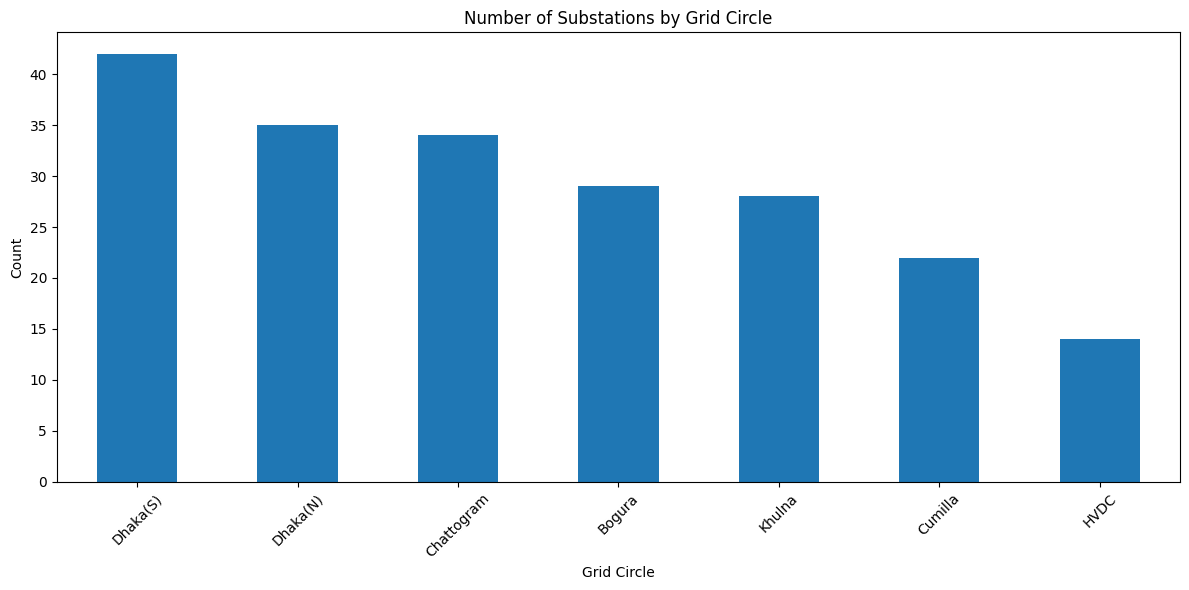

In [18]:
# Distribution across Grid Circles
grid_circle_counts = df['Grid_Circle'].value_counts()

plt.figure(figsize=(12, 6))
grid_circle_counts.plot(kind='bar')
plt.title('Number of Substations by Grid Circle')
plt.xlabel('Grid Circle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Total capacity by Grid Circle
grid_circle_capacity = df.groupby('Grid_Circle')['Total_MVA'].agg(['sum', 'mean', 'count'])
print("\nCapacity Statistics by Grid Circle:")
print(grid_circle_capacity.sort_values('sum', ascending=False))


Capacity Statistics by Grid Circle:
                 sum        mean  count
Grid_Circle                            
Dhaka(N)     13412.6  383.217143     35
Dhaka(S)     13293.0  332.325000     40
Bogura       10896.0  389.142857     28
Khulna       10083.0  360.107143     28
Chattogram    9130.6  268.547059     34
Cumilla       6502.0  295.545455     22
HVDC          4303.3  307.378571     14


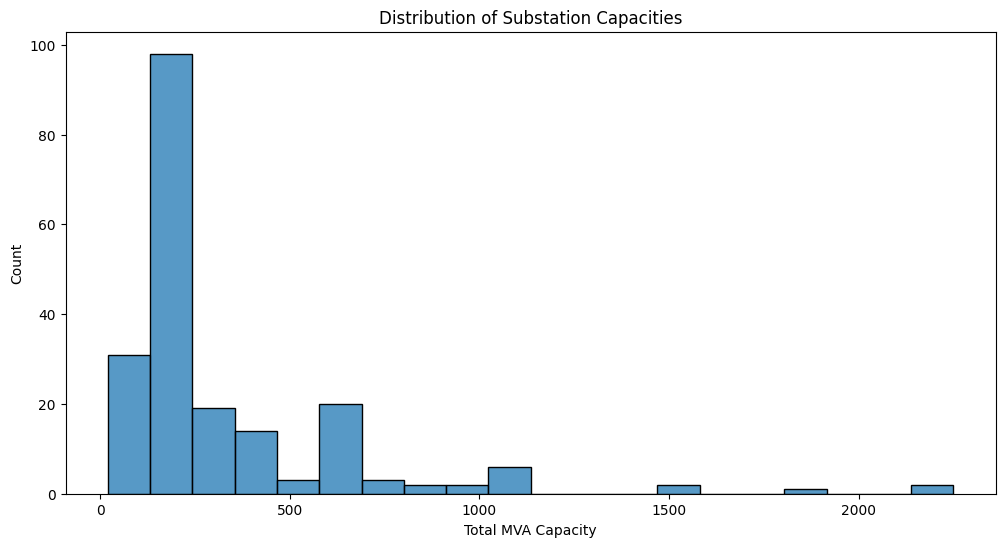

In [20]:
# Distribution of Substation Capacity
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Total_MVA', bins=20)
plt.title('Distribution of Substation Capacities')
plt.xlabel('Total MVA Capacity')
plt.ylabel('Count')
plt.show()

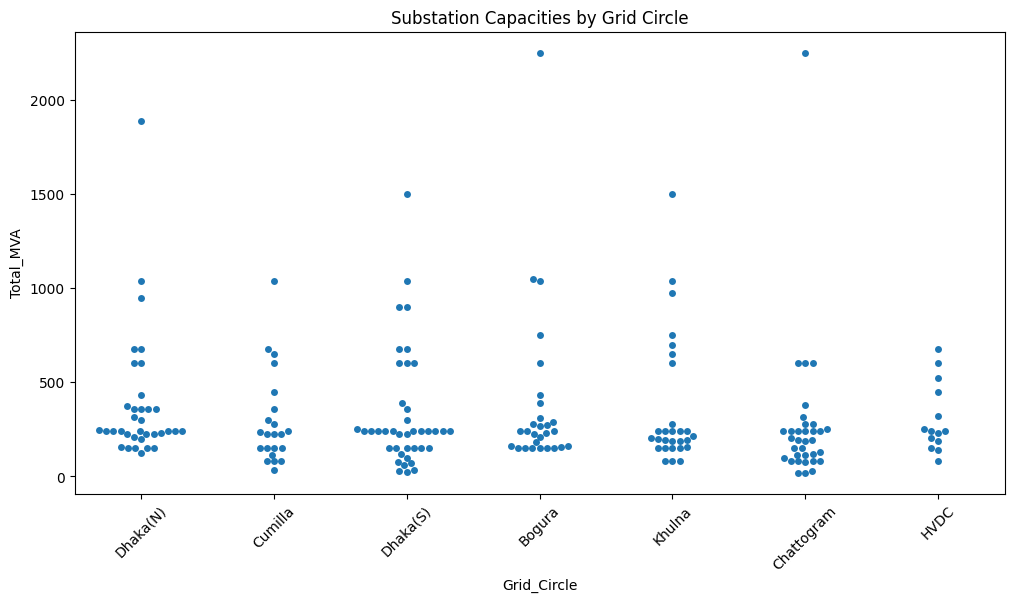

In [25]:
# Box plot of capacities by Grid Circle
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Grid_Circle', y='Total_MVA')
plt.xticks(rotation=45)
plt.title('Substation Capacities by Grid Circle')
plt.show()

In [26]:
# Top 10 substations by capacity
print("Top 10 Substations by Capacity:")
print(df.nlargest(10, 'Total_MVA')[['Name', 'Total_MVA', 'Grid_Circle', 'GMD']])

Top 10 Substations by Capacity:
             Name  Total_MVA Grid_Circle     GMD
6      Bogura (W)     2250.0      Bogura     NaN
10     Madunaghat     2250.0  Chattogram     NaN
2       Aminbazar     1885.0    Dhaka(N)     NaN
7   Gopalganj (N)     1500.0      Khulna     NaN
9      Meghnaghat     1500.0    Dhaka(S)     NaN
23         Bogura     1050.0      Bogura  Bogura
4          Bhulta     1040.0    Dhaka(S)     NaN
5        Bibiyana     1040.0     Cumilla     NaN
8       Kaliakoir     1040.0    Dhaka(N)     NaN
11         Rampal     1040.0      Khulna     NaN


In [27]:
# Bottom 10 smallest substations
print("\nBottom 10 Smallest Substations:")
print(df.nsmallest(10, 'Total_MVA')[['Name', 'Total_MVA', 'Grid_Circle', 'GMD']])


Bottom 10 Smallest Substations:
                   Name  Total_MVA Grid_Circle       GMD
125              Kaptai       20.0  Chattogram       NaN
137                KYCR       20.0  Chattogram       NaN
179                RSRM       25.0    Dhaka(S)       NaN
150           MI Cement       28.0    Dhaka(S)       NaN
154                MSML       30.0  Chattogram    CTG(C)
68   Bashundhara Cement       35.0    Dhaka(S)       NaN
175                 PHP       35.0     Cumilla   Cumilla
193        Seven Circle       60.0    Dhaka(S)       NaN
60          Bangabhaban       70.0    Dhaka(S)       NaN
78                BMPIL       75.0    Dhaka(S)  Dhaka(E)


In [29]:
# GMD analysis
gmd_capacity = df.groupby('GMD')['Total_MVA'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
print("\nCapacity Statistics by GMD:")
print(gmd_capacity)


Capacity Statistics by GMD:
               sum        mean  count
GMD                                  
Dhaka(E)    3100.0  387.500000      8
Dhaka(NW)   2835.0  354.375000      8
Dhaka(N)    2735.0  390.714286      7
Cumilla     2735.0  248.636364     11
CTG(N)      2715.0  226.250000     12
Bogura      2429.0  404.833333      6
Jhenaidah   2389.3  298.662500      8
Rajshahi    2218.0  277.250000      8
CTG(C)      2141.0  214.100000     10
Ishwardi    2064.0  294.857143      7
Dhaka(S)    1965.0  393.000000      5
Dhaka(C)    1890.0  472.500000      4
Faridpur    1802.0  300.333333      6
CTG(S)      1788.0  255.428571      7
Barishal    1698.0  242.571429      7
Khulna(S)   1431.0  286.200000      5
Rangpur     1427.0  203.857143      7
Dinajpur    1382.0  345.500000      4
Mymensingh  1181.6  236.320000      5
Sylhet       912.0  228.000000      4
Khulna(N)    787.0  157.400000      5
Srimangal    715.0  178.750000      4
Kaliakoir    660.0  220.000000      3
Narsingdi    465.0  2

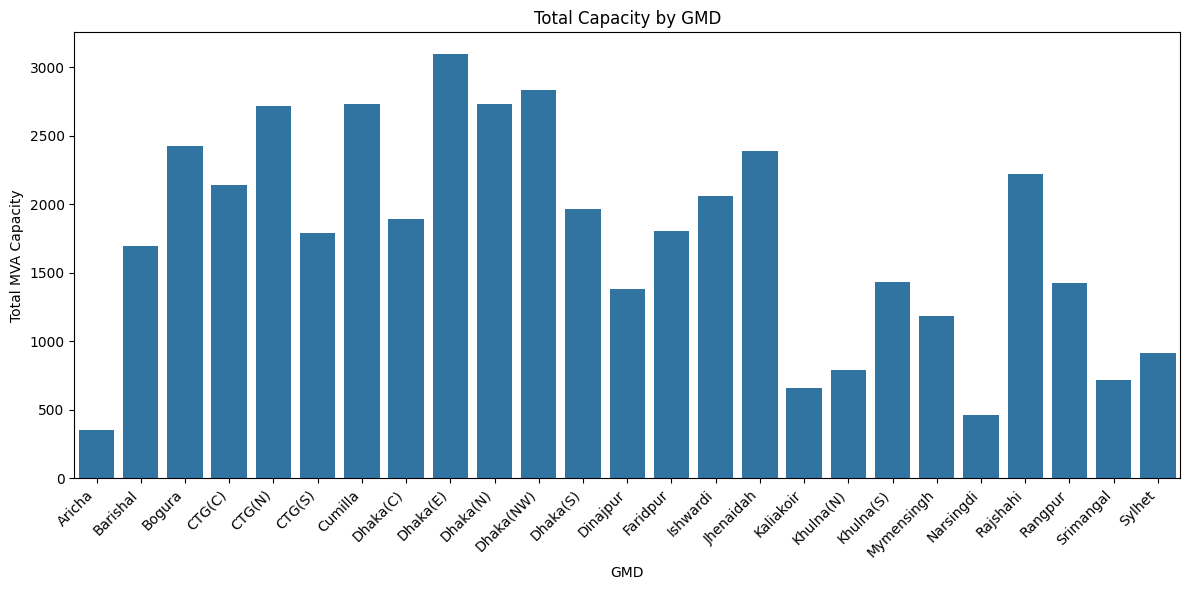

In [32]:
# Visualize GMD distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=df, 
            x='GMD', 
            y='Total_MVA', 
            estimator=sum, 
            errorbar=None,
            order=sorted(df['GMD'].dropna().unique())) # Sort GMDs alphabetically

plt.xticks(rotation=45, ha='right')  # Adding ha='right' for better label alignment
plt.title('Total Capacity by GMD')
plt.xlabel('GMD')
plt.ylabel('Total MVA Capacity')
plt.tight_layout()
plt.show()